<a href="https://colab.research.google.com/github/Ebasurtos/Data-Discovery/blob/main/BASURTO_SIUCE%2C_Eder_Lab4_Data_Discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://posgrado.utec.edu.pe/sites/default/files/2023-08/Testimonial-home-2.jpg" alt="HTML5 Icon" width="900" height="250" >

# **Laboratorio: Advanced Data Cleaning and Feature Transformation with House Prices Dataset**

---

# **ALUMNO: Eder Basurto Siuce**

## **Objetivo general**

Aplicar técnicas avanzadas de limpieza de datos, codificación de variables categóricas, discretización y transformaciones numéricas (incluyendo polinómicas) sobre un dataset real para preparar la información antes del modelado.


## **1. Introducción teórica**

En cualquier proyecto de ciencia de datos, **la etapa de preprocesamiento puede ocupar hasta el 80% del tiempo total.** Esto se debe a que los datos rara vez vienen listos para usarse: suelen tener errores, valores faltantes, formatos inconsistentes y escalas incompatibles.


La limpieza avanzada no se limita a eliminar nulos o duplicados, sino que abarca tareas más profundas como:


- Detectar inconsistencias semánticas (mismo valor escrito de forma distinta).

- Estandarizar formatos (fechas, unidades de medida, codificación de texto).

- Identificar y tratar outliers que afectan análisis y modelos.

- Aplicar transformaciones matemáticas para mejorar la distribución de las variables y la capacidad predictiva de los modelos.

## **2. Carga y exploración inicial del dataset**

Usaremos el dataset House Prices – Advanced Regression Techniques de Kaggle.

In [ ]:
import pandas as pd

# Cargar datos
df = pd.read_csv('train.csv')

# Dimensiones y primeras filas
print(df.shape)
df.head()

# Información general
df.info()

# Resumen estadístico
df.describe()

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## **3. Limpieza avanzada de datos**



**3.1 Detección de valores faltantes**

In [ ]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


Aquí detectamos columnas con valores faltantes. Algunos datasets codifican los nulos como “NA” o “0” en lugar de NaN, por lo que también conviene revisar valores únicos por columna.

**3.2 Imputación de valores**



Numéricos – usando la mediana para evitar el efecto de outliers:

In [ ]:
from sklearn.impute import SimpleImputer

# Imputador numérico usando la mediana
num_imputer = SimpleImputer(strategy='median')
df['LotFrontage'] = num_imputer.fit_transform(df[['LotFrontage']])

Categóricos – usando la moda o creando una categoría “Missing”:

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Usar pandas fillna para imputar con la moda
most_frequent_masvnrtype = df['MasVnrType'].mode()[0]
df['MasVnrType'] = df['MasVnrType'].fillna(most_frequent_masvnrtype)

# Verificar valores faltantes restantes en 'MasVnrType'
print("Valores faltantes en 'MasVnrType' después de la imputación:", df['MasVnrType'].isnull().sum())

Valores faltantes en 'MasVnrType' después de la imputación: 0


> Usar media puede distorsionar si hay valores extremos.
>
> Usar mediana es más robusto frente a outliers.
>
> Para categóricos, asignar “Missing” puede conservar la información de que el valor no estaba registrado.

**3.3 Corrección de inconsistencias de formato**

In [ ]:
# Eliminar espacios en blanco y capitalizar la primera letra de cada palabra
df['Neighborhood'] = df['Neighborhood'].str.strip().str.title()

Esto asegura consistencia en mayúsculas/minúsculas y elimina espacios extra.



**3.4 Duplicados exactos y casi-duplicados**


In [ ]:
# Eliminar duplicados exactos
df.drop_duplicates(inplace=True)

**3.5 Outliers**

Usaremos el rango intercuartílico (IQR):

In [ ]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
# Calcular el Rango Intercuartílico (IQR)
IQR = Q3 - Q1

# Identificar outliers usando la regla de 1.5 * IQR
outliers = df[(df['SalePrice'] < Q1 - 1.5*IQR) | (df['SalePrice'] > Q3 + 1.5*IQR)]
outliers.shape

(61, 81)

Outliers detectados no siempre deben eliminarse: en precios de casas, un valor alto puede ser legítimo.

## **4. Codificación de variables categóricas**

**4.1 One-Hot Encoding**

Convierte categorías en columnas binarias.

In [ ]:
# Aplicar One-Hot Encoding a la columna 'Neighborhood', eliminando la primera categoría para evitar la multicolinealidad
df = pd.get_dummies(df, columns=['Neighborhood'], drop_first=True)

**4.2 Label Encoding**

Asigna un número entero a cada categoría (útil para variables ordinales).

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inicializar LabelEncoder
le = LabelEncoder()
# Aplicar Label Encoding a la columna 'Street'
df['Street'] = le.fit_transform(df['Street'])

**4.3 Target Encoding (avanzado, riesgo de data leakage)**

In [ ]:
import category_encoders as ce

# Inicializar TargetEncoder para la columna 'MSZoning'
te = ce.TargetEncoder(cols=['MSZoning'])
# Aplicar Target Encoding
df['MSZoning'] = te.fit_transform(df['MSZoning'], df['SalePrice'])

## **5. Discretización de variables continuas**

Reduce una variable continua a intervalos o “bins”.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# Inicializar KBinsDiscretizer con 4 bins, codificación ordinal y estrategia de cuantiles
kb = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
# Aplicar discretización a 'SalePrice' y crear una nueva columna
df['SalePrice_bin'] = kb.fit_transform(df[['SalePrice']])

Útil cuando queremos reducir la sensibilidad del modelo a variaciones pequeñas o cuando la variable tiene relación no lineal con la respuesta.

## **6. Transformaciones numéricas avanzadas**


**6.1 Transformación logarítmica**


Reduce asimetría en variables sesgadas a la derecha.

In [ ]:
import numpy as np
# Aplicar transformación logarítmica (log(1+x)) a 'SalePrice'
df['SalePrice_log'] = np.log1p(df['SalePrice'])

**6.2 Min–Max Scaling**

Escala los valores a un rango fijo [0, 1].

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar MinMaxScaler
mm_scaler = MinMaxScaler()
# Aplicar Min-Max Scaling a 'LotArea' y 'GrLivArea'
df[['LotArea_mm', 'GrLivArea_mm']] = mm_scaler.fit_transform(df[['LotArea', 'GrLivArea']])

**6.3 Z-score Standardization**

Centra en media 0 y desv. estándar 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inicializar StandardScaler
scaler = StandardScaler()
# Aplicar Z-score Standardization a 'LotArea' y 'GrLivArea'
df[['LotArea_z', 'GrLivArea_z']] = scaler.fit_transform(df[['LotArea', 'GrLivArea']])

**6.4 Transformaciones polinómicas**

Genera nuevas variables como combinaciones polinómicas de las existentes.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Inicializar PolynomialFeatures con grado 2, sin incluir el término de sesgo
poly = PolynomialFeatures(degree=2, include_bias=False)
# Generar características polinómicas para 'GrLivArea' y 'LotArea'
poly_features = poly.fit_transform(df[['GrLivArea', 'LotArea']])
# Crear un DataFrame con las características polinómicas y nombres de columnas
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['GrLivArea', 'LotArea']))

# Concatenar el DataFrame original con el DataFrame de características polinómicas
df = pd.concat([df, poly_df], axis=1)

Útil para modelos lineales que no capturan interacciones o curvaturas de forma natural. Ojo: puede aumentar mucho la dimensionalidad.

## **7. Evaluación visual del impacto**


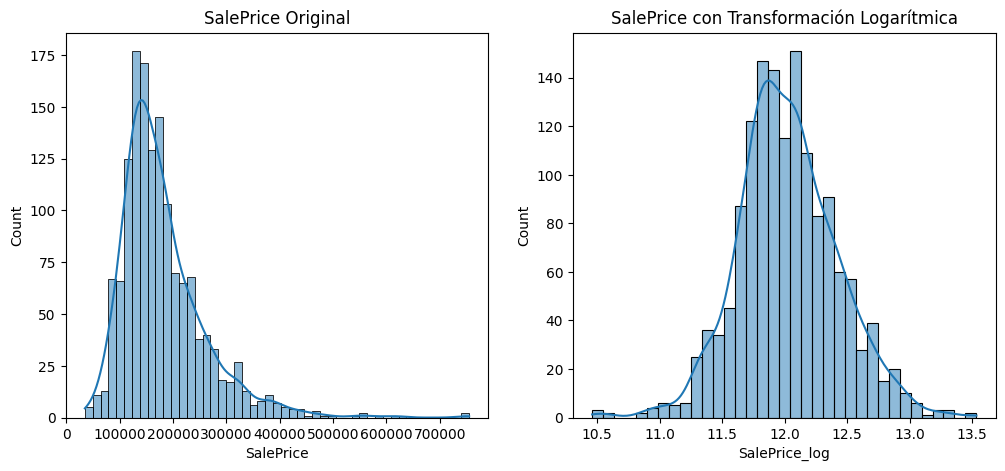

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(12,5))
# Histograma de 'SalePrice' original
sns.histplot(df['SalePrice'], ax=axes[0], kde=True)
axes[0].set_title("SalePrice Original")
# Histograma de 'SalePrice' con transformación logarítmica
sns.histplot(df['SalePrice_log'], ax=axes[1], kde=True)
axes[1].set_title("SalePrice con Transformación Logarítmica")
# Mostrar los plots
plt.show()

## **Tarea**

- Identificar y corregir inconsistencias en otra columna categórica.

- Imputar una variable numérica usando media, mediana y KNN, y comparar resultados.

- Comparar One-Hot Encoding vs. Target Encoding en términos de número de columnas y posible overfitting.

- Discretizar LotArea usando equal-width binning.

- Generar transformaciones polinómicas de grado 3 para tres variables numéricas y evaluar cuántas columnas nuevas produce.

# **RESOLUCIÓN DE TAREA:**



*   **Identificar y corregir inconsistencias en otra columna categórica**




In [ ]:
# Identificar valores únicos en 'Exterior1st' antes de la corrección
print("Valores únicos en 'Exterior1st' antes de la corrección:", df['Exterior1st'].unique())

# Corregir inconsistencias eliminando espacios en blanco y capitalizando
df['Exterior1st'] = df['Exterior1st'].str.strip().str.title()

# Verificar valores únicos después de la corrección
print("Valores únicos en 'Exterior1st' después de la corrección:", df['Exterior1st'].unique())

Valores únicos en 'Exterior1st' antes de la corrección: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Valores únicos en 'Exterior1st' después de la corrección: ['Vinylsd' 'Metalsd' 'Wd Sdng' 'Hdboard' 'Brkface' 'Wdshing' 'Cemntbd'
 'Plywood' 'Asbshng' 'Stucco' 'Brkcomm' 'Asphshn' 'Stone' 'Imstucc'
 'Cblock']




*   **Imputar una variable numérica usando media, mediana y KNN, y comparar resultados**



Variables numéricas con valores faltantes:
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

Valores faltantes en LotFrontage: 259

Estadísticas descriptivas después de imputación:
          Original        Media      Mediana          KNN
count  1201.000000  1460.000000  1460.000000  1460.000000
mean     70.049958    70.049958    69.863699    70.155890
std      24.284752    22.024023    22.027677    22.743551
min      21.000000    21.000000    21.000000    21.000000
25%      59.000000    60.000000    60.000000    60.000000
50%      69.000000    70.049958    69.000000    70.000000
75%      80.000000    79.000000    79.000000    80.000000
max     313.000000   313.000000   313.000000   313.000000


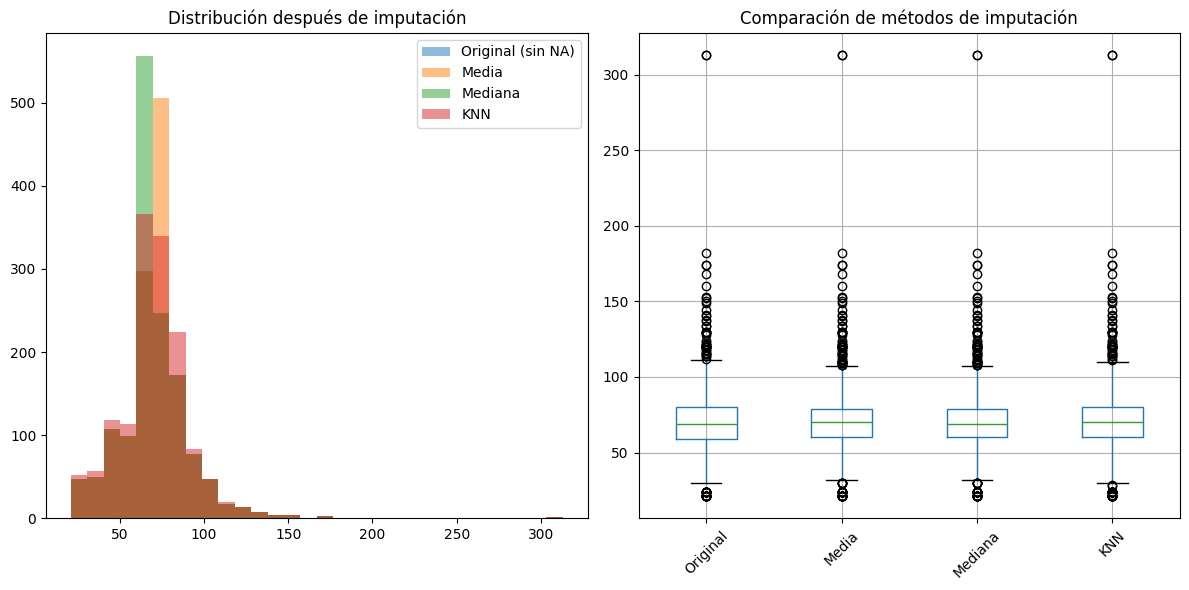

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Cargar datos
data = pd.read_csv('train.csv')

# 2. Identificar variables numéricas con valores faltantes
numeric_cols = data.select_dtypes(include=[np.number]).columns
missing_numeric = data[numeric_cols].isna().sum()
missing_numeric = missing_numeric[missing_numeric > 0]
print("Variables numéricas con valores faltantes:")
print(missing_numeric)

# 3. Seleccionar variable para imputación (ej. LotFrontage)
target_col = 'LotFrontage'
original_data = data[target_col].copy()
print(f"\nValores faltantes en {target_col}: {original_data.isna().sum()}")

# 4. Métodos de imputación
# 4.1 Media
mean_imputed = data[target_col].fillna(data[target_col].mean())

# 4.2 Mediana
median_imputed = data[target_col].fillna(data[target_col].median())

# 4.3 KNN
# Escalar datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_cols])

# Aplicar KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputed_data = knn_imputer.fit_transform(scaled_data)

# Recuperar valores imputados
col_index = list(numeric_cols).index(target_col)
knn_imputed = knn_imputed_data[:, col_index]

# Escalar de vuelta
knn_imputed = scaler.inverse_transform(
    np.column_stack([knn_imputed if i == col_index else scaled_data[:, i]
                    for i in range(scaled_data.shape[1])])
)[:, col_index]
knn_imputed = pd.Series(knn_imputed, index=data.index)

# 5. Comparación
comparison = pd.DataFrame({
    'Original': original_data,
    'Media': mean_imputed,
    'Mediana': median_imputed,
    'KNN': knn_imputed
})

print("\nEstadísticas descriptivas después de imputación:")
print(comparison.describe())

# Visualización
plt.figure(figsize=(12, 6))

# Histogramas
plt.subplot(1, 2, 1)
plt.hist(original_data.dropna(), bins=30, alpha=0.5, label='Original (sin NA)')
plt.hist(mean_imputed, bins=30, alpha=0.5, label='Media')
plt.hist(median_imputed, bins=30, alpha=0.5, label='Mediana')
plt.hist(knn_imputed, bins=30, alpha=0.5, label='KNN')
plt.title('Distribución después de imputación')
plt.legend()

# Boxplots
plt.subplot(1, 2, 2)
comparison.boxplot()
plt.title('Comparación de métodos de imputación')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

*   **Comparar One-Hot Encoding vs. Target Encoding en términos de número de columnas y posible overfitting.**

In [ ]:
import pandas as pd
import category_encoders as ce

# Crear una copia fresca del dataframe para esta comparación
df_encoding_comparison = pd.read_csv('train.csv')

# One-Hot Encoding en 'Neighborhood'
df_one_hot = pd.get_dummies(df_encoding_comparison, columns=['Neighborhood'], drop_first=True)
print(f"Número de columnas después de One-Hot Encoding en 'Neighborhood': {df_one_hot.shape[1]}")

# Target Encoding en 'Neighborhood'
# Es necesario manejar los posibles valores faltantes en 'SalePrice' para Target Encoding si los hubiera
# (aunque en este dataset 'SalePrice' no tiene valores faltantes)
te = ce.TargetEncoder(cols=['Neighborhood'])
df_target_encoded = te.fit_transform(df_encoding_comparison['Neighborhood'], df_encoding_comparison['SalePrice'])
print(f"Número de columnas después de Target Encoding en 'Neighborhood': {df_target_encoded.shape[1]}")

# Discusión sobre overfitting
print("\nComparación:")
print("One-Hot Encoding crea una nueva columna binaria para cada categoría (menos una si drop_first=True), aumentando significativamente la dimensionalidad para características con alta cardinalidad.")
print("Target Encoding reemplaza la categoría por la media de la variable objetivo para esa categoría. Crea solo una nueva columna.")
print("\nRiesgo de Overfitting:")
print("One-Hot Encoding puede llevar a un número muy alto de características (alta dimensionalidad), lo que puede aumentar el riesgo de overfitting, especialmente con datos limitados.")
print("Target Encoding también puede llevar a overfitting, particularmente si una categoría aparece solo unas pocas veces en los datos de entrenamiento. El valor codificado para esa categoría estará fuertemente influenciado por esos pocos puntos de datos. A menudo se utilizan técnicas de validación cruzada o suavizado con Target Encoding para mitigar este riesgo.")

Número de columnas después de One-Hot Encoding en 'Neighborhood': 104
Número de columnas después de Target Encoding en 'Neighborhood': 1

Comparación:
One-Hot Encoding crea una nueva columna binaria para cada categoría (menos una si drop_first=True), aumentando significativamente la dimensionalidad para características con alta cardinalidad.
Target Encoding reemplaza la categoría por la media de la variable objetivo para esa categoría. Crea solo una nueva columna.

Riesgo de Overfitting:
One-Hot Encoding puede llevar a un número muy alto de características (alta dimensionalidad), lo que puede aumentar el riesgo de overfitting, especialmente con datos limitados.
Target Encoding también puede llevar a overfitting, particularmente si una categoría aparece solo unas pocas veces en los datos de entrenamiento. El valor codificado para esa categoría estará fuertemente influenciado por esos pocos puntos de datos. A menudo se utilizan técnicas de validación cruzada o suavizado con Target Encodi

*   **Discretizar LotArea usando equal-width binning**

In [ ]:
import pandas as pd
import numpy as np

# Extraer la columna LotArea
lot_area = df['LotArea']

# Configurar el número de bins deseado (por ejemplo, 5 bins)
num_bins = 5

# Calcular los límites de los bins usando equal-width binning
min_val = lot_area.min()
max_val = lot_area.max()
bin_width = (max_val - min_val) / num_bins

# Crear los límites de los bins
bins = [min_val + i * bin_width for i in range(num_bins + 1)]

# Etiquetas para los bins
labels = [f'Bin {i+1} ({int(bins[i])}-{int(bins[i+1])})' for i in range(num_bins)]

# Discretizar los datos
df['LotArea_Binned'] = pd.cut(lot_area, bins=bins, labels=labels, include_lowest=True)

# Mostrar los primeros registros para verificar
print(df[['LotArea', 'LotArea_Binned']].head())

# Mostrar el conteo de valores en cada bin
print("\nConteo por bin:")
print(df['LotArea_Binned'].value_counts().sort_index())

   LotArea      LotArea_Binned
0     8450  Bin 1 (1300-44089)
1     9600  Bin 1 (1300-44089)
2    11250  Bin 1 (1300-44089)
3     9550  Bin 1 (1300-44089)
4    14260  Bin 1 (1300-44089)

Conteo por bin:
LotArea_Binned
Bin 1 (1300-44089)       1447
Bin 2 (44089-86878)         9
Bin 3 (86878-129667)        1
Bin 4 (129667-172456)       2
Bin 5 (172456-215245)       1
Name: count, dtype: int64


*   **Generar transformaciones polinómicas de grado 3 para tres variables numéricas y evaluar cuántas columnas nuevas produce.**

In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Cargar los datos
data = pd.read_csv('train.csv')

# Seleccionar tres variables numéricas (por ejemplo: 'LotArea', 'GrLivArea', 'TotalBsmtSF')
numeric_vars = ['LotArea', 'GrLivArea', 'TotalBsmtSF']
X = data[numeric_vars].dropna()

# Crear transformación polinómica de grado 3
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# Obtener nombres de las características
feature_names = poly.get_feature_names_out(input_features=numeric_vars)

# Crear DataFrame con las nuevas características
poly_df = pd.DataFrame(X_poly, columns=feature_names)

# Mostrar información sobre las transformaciones
print(f"Número de variables originales: {len(numeric_vars)}")
print(f"Número de nuevas características polinómicas: {len(poly_df.columns)}")
print("\nNombres de las nuevas características:")
print(feature_names)

# Mostrar las primeras filas del DataFrame transformado
print("\nPrimeras filas del DataFrame transformado:")
print(poly_df.head())

Número de variables originales: 3
Número de nuevas características polinómicas: 19

Nombres de las nuevas características:
['LotArea' 'GrLivArea' 'TotalBsmtSF' 'LotArea^2' 'LotArea GrLivArea'
 'LotArea TotalBsmtSF' 'GrLivArea^2' 'GrLivArea TotalBsmtSF'
 'TotalBsmtSF^2' 'LotArea^3' 'LotArea^2 GrLivArea' 'LotArea^2 TotalBsmtSF'
 'LotArea GrLivArea^2' 'LotArea GrLivArea TotalBsmtSF'
 'LotArea TotalBsmtSF^2' 'GrLivArea^3' 'GrLivArea^2 TotalBsmtSF'
 'GrLivArea TotalBsmtSF^2' 'TotalBsmtSF^3']

Primeras filas del DataFrame transformado:
   LotArea  GrLivArea  TotalBsmtSF    LotArea^2  LotArea GrLivArea  \
0   8450.0     1710.0        856.0   71402500.0         14449500.0   
1   9600.0     1262.0       1262.0   92160000.0         12115200.0   
2  11250.0     1786.0        920.0  126562500.0         20092500.0   
3   9550.0     1717.0        756.0   91202500.0         16397350.0   
4  14260.0     2198.0       1145.0  203347600.0         31343480.0   

   LotArea TotalBsmtSF  GrLivArea^2  GrLivA